In [1]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import plot as pltfn
import admin_functions as adfn
from scipy import stats 
import IS as isfn
import pandas as pd

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload
     
# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

In [16]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
powlist = sorted(glob.glob('*param*power.npy*')) 
loglist = sorted(glob.glob('*param*logn*'))
powlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_param_marglik_power.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_param_marglik_power.npy']

In [17]:
loglist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_param_marglik_logn.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_param_marglik_logn.npy']

In [ ]:
shape = 320
avlist = list(range(shape))
nums = adfn.name(F10t, experiment, 2, 12)
for t in nums:
    itav = sorted(glob.glob('*E-' + str(t) + '*nnbav.npy*')) 
    for i in range(len(itav)): 
        avlist[i] = powerfit(Fdrop, experiment, np.load(itav[i])[0])
    np.save(Fdrop + 'Project/' + experiment + os.sep + itav[i][:itav[i].find('run')+6] + 'sizeparamsweepp_log', avlist)
    print('Done fish num ' + str(f))     

In [ ]:
for i in num1:
    avlist =  sorted(glob.glob('*-' + i + '*BLN*nnbav.npy'))[:180]
    powerlist = list(range(200))
    lognlist = list(range(200))
    for e in range(len(avlist)):
        data = np.load(avlist[e])
        sizes=data[0,:]
        M=len(sizes)
        a=min(sizes) #define xmin
        b=max(sizes) #define xmax
        npart = 2000 #number of particles - number of draws from prior distribution
        ln=IS_LN(npart)
        po=IS(npart)
        powerlist[e] = po
        lognlist[e] = ln
        print('Done param ' + str(e) + 'for fish ' + adfn.name_template([avlist[e]], 'short'))
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[e]], 'short') + '_marglik_power.npy', powerlist)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[e]], 'short') + '_marglik_logn.npy', lognlist)
    print('Done fish ' + adfn.name_template([avlist[e]], 'short'))

# Baseline - parameter sweep

### Exponent
* exponent is parameter dependent
* variance decreases as the exponent approaches theoretical values ~ 2.0
* Higher P(Ca2+ event) values over-estimate firing frequency - we chose those that best capture firing events in data

In [3]:
shape = (200)
count=0
expsum = np.zeros((shape))
varvec = np.zeros((shape))
for i in range(shape):
    evec = []
    for t in range(len(powlist)):
        if type(np.load(powlist[t], allow_pickle=True)[i]) is not int:
            evec = np.append(evec, np.load(powlist[t], allow_pickle = True)[i][0])
        varvec[i] = np.var(evec)
        expsum[i] = np.sum(evec)/len(evec) 

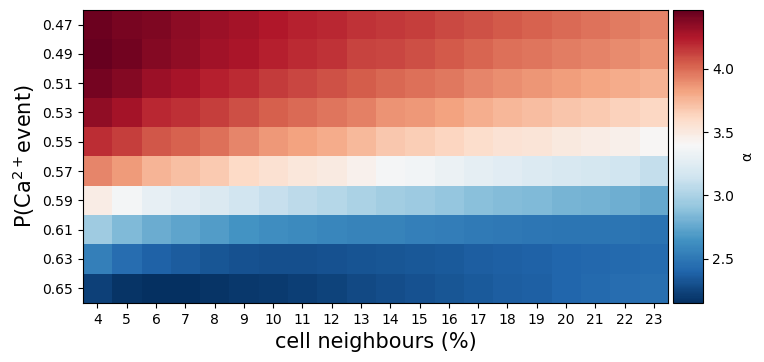

In [4]:
#EXPONENT
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))

divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(expsum.shape[0]/nnbs)
expav = expsum.reshape((bcls,nnbs))    
plot1 = ax.imshow(expav, cmap = 'RdBu_r', norm = divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'α')
plt.show()

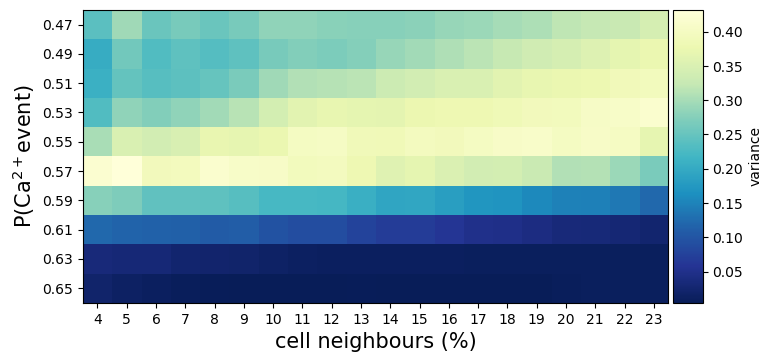

In [5]:
#VARIANCE
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))

#divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(varvec.shape[0]/nnbs)
varav = varvec.reshape((bcls,nnbs))    
plot1 = ax.imshow(varav, cmap = 'YlGnBu_r')#, norm = divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'variance')
plt.show()

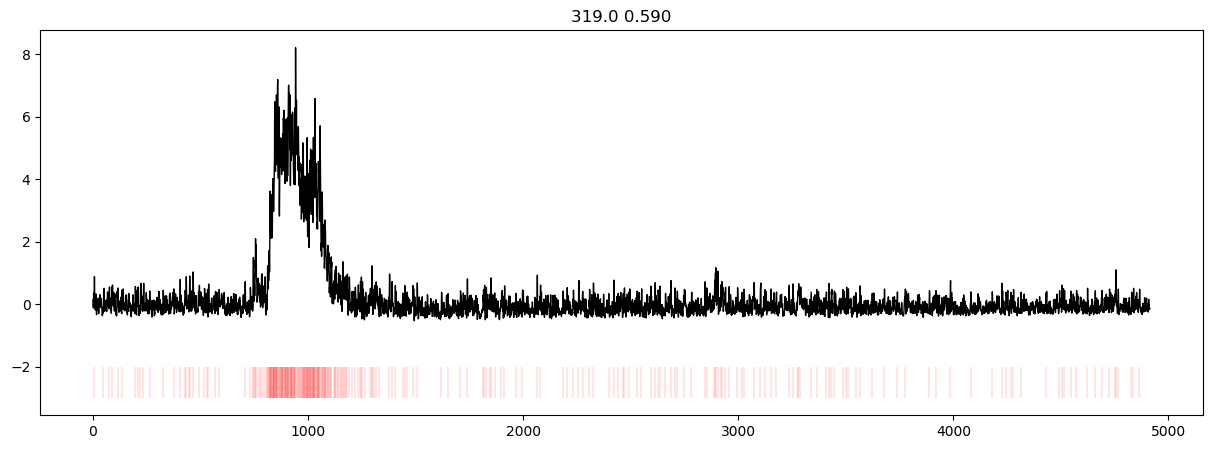

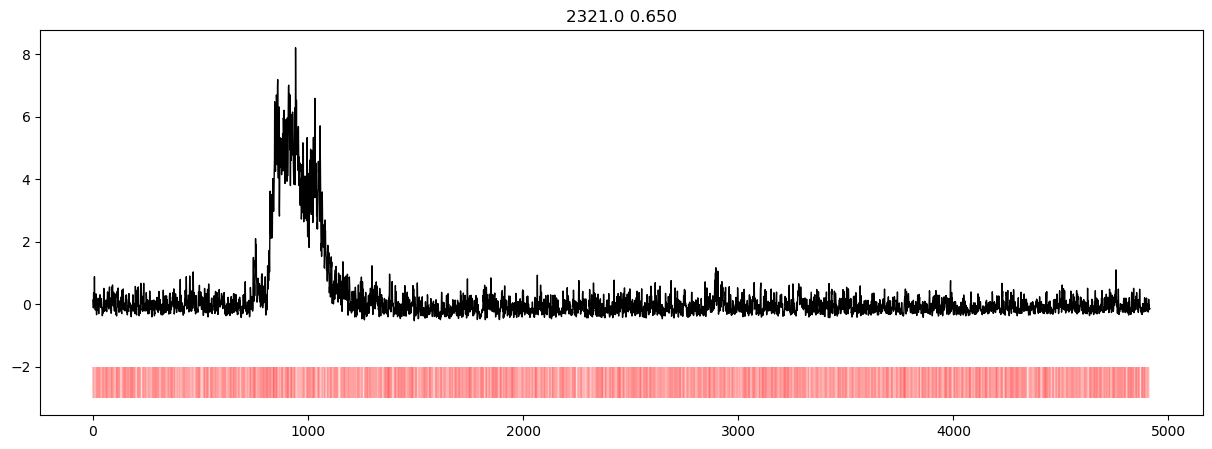

In [6]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
c = 2

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.590binarised.npy'))
callist = sorted(glob.glob('*BLN*0.590modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c], color = 'k', linewidth = 1)
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.590'))
plt.show()

os.chdir(F10t + 'Project/' + experiment)
binlist = sorted(glob.glob('*BLN*0.650binarised.npy'))
callist = sorted(glob.glob('*BLN*0.650modelcal.npy'))
dlist = sorted(glob.glob('*BLN*deltaff.npy'))
f, axarr = plt.subplots(figsize = (15,5))
plt.plot(np.load(dlist[0])[c], color = 'k', linewidth = 1)
for x in np.where(np.load(binlist[0])[c] == 1)[0]: plt.vlines(x=x,  alpha = 0.1, ymin = -3, ymax = -2, color = 'red')
plt.title(str(np.sum(np.load(binlist[0])[c]))+ str(' 0.650'))
plt.show()

#### Marginal likelihood map
* power law is invariant to parameters

* {calculate individual marginal likelihood values for each fish}
* {loglik ratio - sum marglikelihoods for each fish for power law and lognormal - overall ratio}

In [18]:
shape = (200)
mratio = np.zeros((shape))
for i in range(shape):
    powvec, logvec = 0,0
    for t in range(len(powlist)):
        if type(np.load(powlist[t], allow_pickle=True)[i]) is not int:
            powvec = powvec + np.load(powlist[t], allow_pickle = True)[i][1]
            logvec = logvec +  np.load(loglist[t], allow_pickle = True)[i][2]
    mratio[i] = powvec - logvec

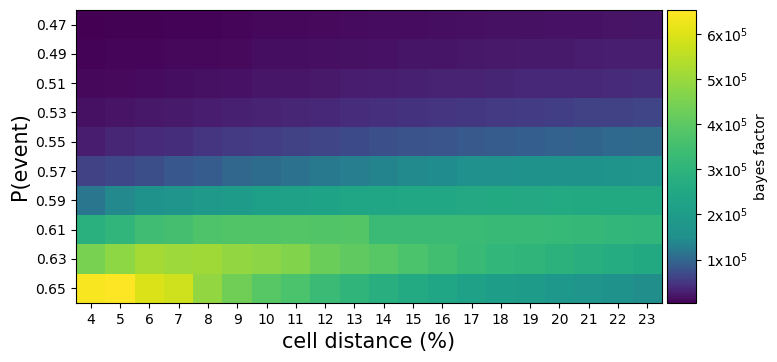

In [19]:
#MARGINAL LIKELIHOOD
from mpl_toolkits.axes_grid1 import make_axes_locatable
divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(mratio.shape[0]/nnbs)
margav = mratio.reshape((bcls,nnbs))    
plot1 = ax.imshow(margav, cmap = 'viridis', norm=divnorm)
ax.set_xlabel('cell distance (%)', size = '15')
ax.set_ylabel('P(event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'bayes factor')
cbar0.ax.set_yticklabels(['1x10$^{5}$', '2x10$^{5}$', '3x10$^{5}$', '4x10$^{5}$', '5x10$^{5}$', '6x10$^{5}$'])  # vertically oriented colorbar
plt.show()

#### Branching ratio map
* branching ratio is close to critical value for all parameter values

In [20]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(F10t + 'Project/' + experiment)
branchlist =  sorted(glob.glob('*-08*BLN*_branch.npy'))

In [21]:
num = adfn.name_zero('front', 2, 12,1)
shape = (200)
b_sum = np.zeros((11, shape))
count=0
for e in num:
    branchlist =  sorted(glob.glob('*E-*' + e + '*BLN*_branch.npy'))
    for i in range(len(branchlist)):
        b_sum[count,i] = np.load(branchlist[i])
    count+=1

b_mean = np.zeros(200)

for i in range(b_sum.shape[1]):
    b_mean[i] = np.sum(b_sum[:,i])/ np.where(b_sum[:,i] >0)[0].shape[0]

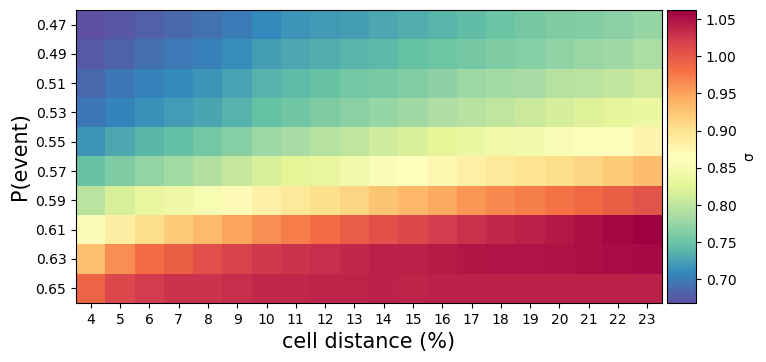

In [22]:
#BRANCHING RATIO
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(b_mean.shape[0]/nnbs)
bmean_mat = b_mean.reshape((bcls,nnbs))    
plot1 = ax.imshow(bmean_mat, cmap = 'Spectral_r')
ax.set_xlabel('cell distance (%)', size = '15')
ax.set_ylabel('P(event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'σ')
plt.show()

# Seizure - parameter sweep

#### KS distance map 
* deviation from baseline distribution is consistent across parameters

In [26]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
kslist = sorted(glob.glob('*_ks*'))
kslist

['_param_ks.npy']

In [27]:
shape = (200)
count=0
ks_sum = np.zeros((shape))
for i in range(shape):
    ks_vec = []
    for t in range(len(np.load(kslist[0]))):
        ks_vec = np.append(ks_vec, np.load(kslist[0])[t][i][0])
        ks_sum[i] = np.sum(ks_vec)/len(ks_vec) 

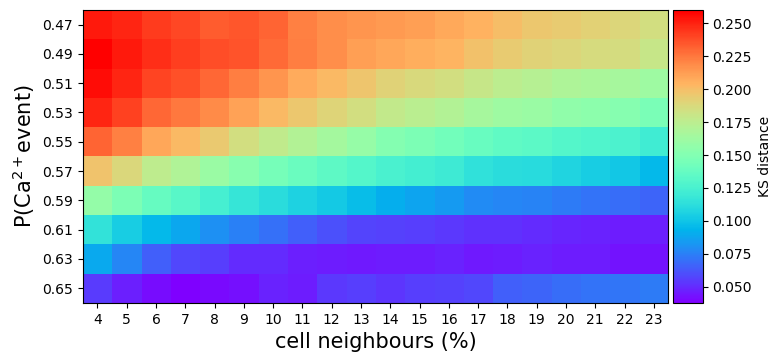

In [28]:
#KS distance
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
    
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(ks_sum.shape[0]/nnbs)
ks_av = ks_sum.reshape((bcls,nnbs))    
plot1 = ax.imshow(ks_av, cmap = 'rainbow')#, norm = divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'KS distance')
plt.show()

In [29]:
shape = (200)
count=0
p_sum = np.zeros((shape))
for i in range(shape):
    p_vec = []
    for t in range(len(np.load(kslist[0]))):
        p_vec = np.append(p_vec, np.load(kslist[0])[t][i][1])
        p_sum[i] = np.sum(p_vec < 0.05)/len(p_vec) 

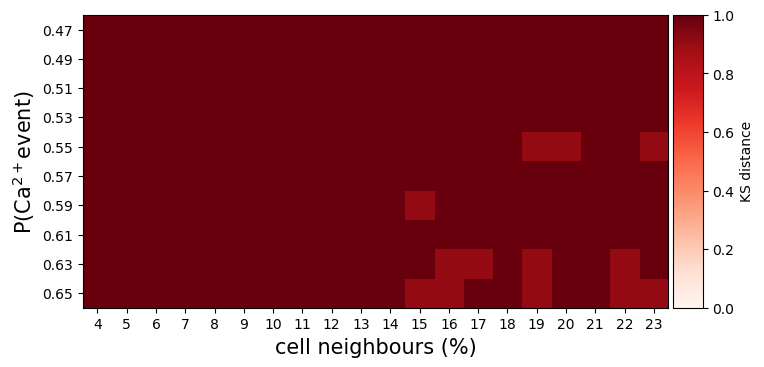

In [30]:
#p value
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
    
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(p_sum.shape[0]/nnbs)
p_av = p_sum.reshape((bcls,nnbs))    
plot1 = ax.imshow(p_av, cmap = 'Reds', vmin = 0, vmax = 1)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'KS distance')
plt.show()

#### Branching ratio change map

In [31]:
num = adfn.name_zero('front', 2, 12,1)
shape = (200)
b_sum = np.zeros((11, shape))
count=0
for e in num:
    b_branchlist =  sorted(glob.glob('*E-*' + e + '*BLN*_branch.npy'))
    p_branchlist =  sorted(glob.glob('*E-*' + e + '*PTZ20*_branch.npy'))
    for i in range(len(b_branchlist)):
        b_sum[count,i] = np.load(p_branchlist[i]) - np.load(b_branchlist[i])
    count+=1

b_mean = np.zeros(200)

for i in range(b_sum.shape[1]):
    b_mean[i] = np.sum(b_sum[:,i])/ np.where(b_sum[:,i] >0)[0].shape[0]

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


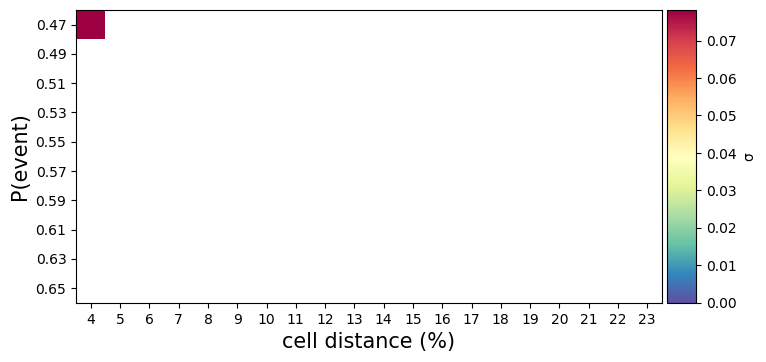

In [32]:
#BRANCHING RATIO CHANGE
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(mratio), vcenter=150000, vmax=np.max(mratio))
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(b_mean.shape[0]/nnbs)
bmean_mat = b_mean.reshape((bcls,nnbs))    
plot1 = ax.imshow(bmean_mat, cmap = 'Spectral_r', vmin = 0)
ax.set_xlabel('cell distance (%)', size = '15')
ax.set_ylabel('P(event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'σ')
plt.show()

# Deviation from baseline dynamics during seizures

### KS distance 
* deviation from baseline critical distribution across all datasets


In [33]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
sblnlist = sorted(glob.glob('*BLN*size*marglik_power.npy*'))
sp5list = sorted(glob.glob('*PTZ05*size*marglik_power.npy*'))
sp20list = sorted(glob.glob('*PTZ20*size*marglik_power.npy*'))
dblnlist = sorted(glob.glob('*BLN*dur*marglik_power.npy*'))
dp5list = sorted(glob.glob('*PTZ05*dur*marglik_power.npy*'))
dp20list = sorted(glob.glob('*PTZ20*dur*marglik_power.npy*'))
blnavlist = sorted(glob.glob('*BLN*_av.npy*'))
p5avlist = sorted(glob.glob('*PTZ05*_av.npy*'))
p20avlist = sorted(glob.glob('*PTZ20*_av.npy*'))
p5avlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ05_run-01_av.npy']

In [ ]:
#SIZE - PTZ20 MARGINAL LIKELIHOODS
""""count=0
choose = 0
prac_blnexp = np.zeros(11)
num1 = adfn.name_zero('front', 2, 12, 1)
for i in num1:
    avlist =  sorted(glob.glob('*E-' + str(i) + '*PTZ05*_av.npy'))
    data = np.load(avlist[0])
    sizes=data[choose]
    M=len(sizes)
    a=min(sizes) #define xmin
    b=max(sizes) #define xmax
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=IS_LN(npart)
    po=IS(npart)
    prac_blnexp[count] = po[0]
    count+=1
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short') + '_size_marglik_power.npy', po)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short')  + '_size_marglik_log.npy', ln)
    print('Done fish ' + adfn.name_template([avlist[0]], 'short')) """"

In [ ]:
#DUR - BASELINE MARGINAL LIKELIHOODS
""""count=0
choose = 1
prac_blnexp = np.zeros(11)
for i in num1:
    avlist =  sorted(glob.glob('*E-' + str(i) + '*PTZ05*_av.npy'))
    data = np.load(avlist[0])
    sizes=data[choose]
    a=2 #define xmin
    b=max(sizes) #define xmax
    M=len(sizes[np.where(sizes>a-1)])
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=IS_LN(npart)
    po=IS(npart)
    prac_blnexp[count] = po[0]
    count+=1
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short') + '_dur_marglik_power.npy', po)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short')  + '_dur_marglik_log.npy', ln)
    print('Done fish ' + adfn.name_template([avlist[0]], 'short'))

In [34]:
#SIZE - KS
ks = np.zeros((22, 2))
avlist = [p5avlist,p20avlist]
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(2):
    flist = np.append(flist, fli)

size_ptz_df = {}
count=0
choose = 0
for i in range(2):
    for y in range(11):
        ks[count] = stats.ks_2samp(np.load(blnavlist[y])[choose],np.load(avlist[i][y])[choose])
        count+=1
size_ptz_df = pd.DataFrame({"KS distance":ks[:,0] , "p":ks[:,1], "Labels":  np.append(adfn.repeat_list('PTZ 5mM',11),adfn.repeat_list('PTZ 20mM',11)), "Fish":flist})

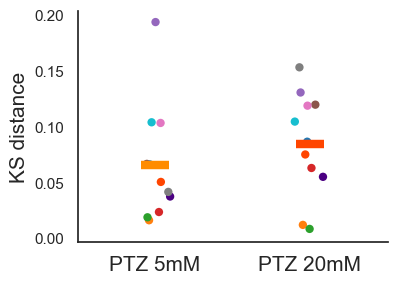

In [35]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['darkorange','orangered']
fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="KS distance", data = size_ptz_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="Labels", y="KS distance", data=size_ptz_df, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance', size = '15')
ax.set_xticklabels(['PTZ 5mM', 'PTZ 20mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [36]:
#DUR - KS
ks = np.zeros((22, 2))
avlist = [p5avlist,p20avlist]
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(2):
    flist = np.append(flist, fli)
    
dur_ptz_df = {}
count=0
choose = 1
for i in range(2):
    for y in range(11):
        ks[count] = stats.ks_2samp(np.load(blnavlist[y])[choose],np.load(avlist[i][y])[choose])
        count+=1
dur_ptz_df = pd.DataFrame({"KS distance":ks[:,0] , "p":ks[:,1], "Labels":  np.append(adfn.repeat_list('PTZ 5mM',11),adfn.repeat_list('PTZ 20mM',11)), "Fish":flist})

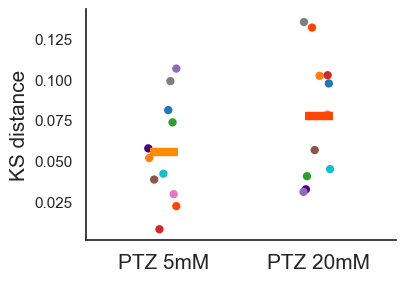

In [37]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['darkorange','orangered']
fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="KS distance", data = dur_ptz_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="Labels", y="KS distance", data=dur_ptz_df, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance', size = '15')
ax.set_xticklabels(['PTZ 5mM', 'PTZ 20mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

### Branching ratio
* Branching ratio increases during seizures beyond critical point

In [38]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnbranchlist = sorted(glob.glob('*BLN*_branch*'))
p5branchlist = sorted(glob.glob('*PTZ05*_branch*'))
p20branchlist = sorted(glob.glob('*PTZ20*_branch*'))
blnbranchlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09__branch.npy']

In [39]:
import pandas as pd
all_list = [blnbranchlist, p5branchlist, p20branchlist]
blist = adfn.list_of_list(3,0)
for t in range(len(blist)):
    for i in range(len(blnbranchlist)):
        blist[t] = np.append(blist[t], np.load(all_list[t][i]))


fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)
branchdic = {
  "branch ratio": np.append(np.append(blist[0], blist[1]),blist[2]), "condition": np.append(np.append(adfn.repeat_list('baseline',11),adfn.repeat_list('PTZ 5mM',11)),adfn.repeat_list('PTZ 20mM',11)), "Fish": flist}
branchdf = pd.DataFrame(branchdic)

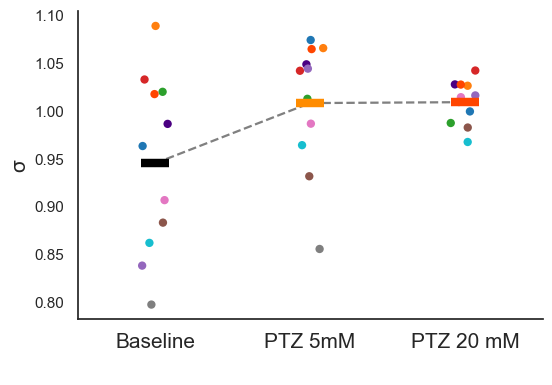

In [40]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="condition", y="branch ratio", data = branchdf, hue = 'condition', palette = colors2, join=True, ci=0, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="condition", y="branch ratio", data=branchdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="condition", y="branch ratio", data=branchdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('σ', size = '15')
ax.set_xticklabels(['Baseline', 'PTZ 5mM', 'PTZ 20 mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [41]:
adfn.ttest(branchdf, 'condition', 'branch ratio', ['baseline', 'PTZ 5mM', 'PTZ 20mM'], mode='single')

[[-3.2933855920860537,
  0.008103536648894847,
  0.025,
  'Significant',
  'baseline - PTZ 5mM'],
 [-2.4970279803941384,
  0.03160737240859102,
  0.025,
  'Not significant',
  'baseline - PTZ 20mM']]

### Connectivity-distance
* compare change in slope in seizure vs baseline

In [42]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
tracelist = sorted(glob.glob('*_PTZ*cut*realtrace*')) 
distlist = sorted(glob.glob('*_PTZ*dist.npy*')) 
binlist = sorted(glob.glob('*_corrdist*'))
coordlist = sorted(glob.glob('*_PTZ*realcoord*'))
distlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_dist.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_dist.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_dist.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_dist.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_dist.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_dist.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_dist.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_dist.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ05_run-01_dist.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_dis

In [ ]:
#Calculate euclidean distance
#for e in range(len(coordlist)):
#    euc_mat = crfn.euclidean_mat(np.load(coordlist[e]), [.5, .5, 15])
#    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, coordlist) + '_' + 'dist.npy', mat)
#    print('Done fish #' + str(e))

In [ ]:
#Calculate corr-dist binning
#for e in range(len(distlist)):
#    corr = np.corrcoef(np.load(tracelist[e]))
#    np.save(savepath + adfn.save_name(e,tracelist) + '_' + 'corr.npy', corr)
#    corrdistbin = crfn.corrdis_bin(corr, np.load(distlist[e]), distlist[e], 200)
#    np.save(savepath + adfn.save_name(e,distlist) + '_' + 'corrdist_bins.npy', corrdistbin)

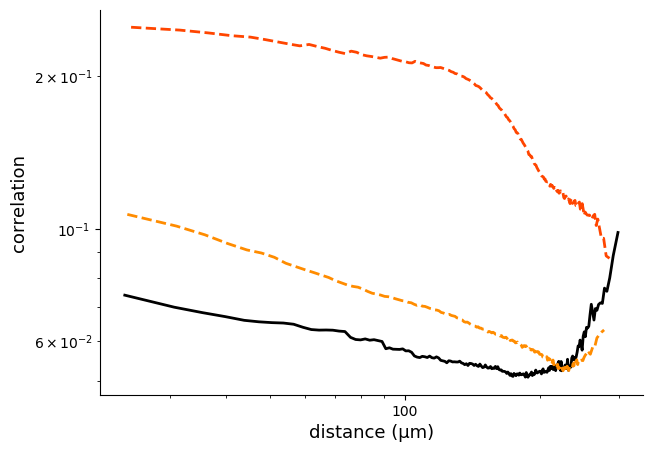

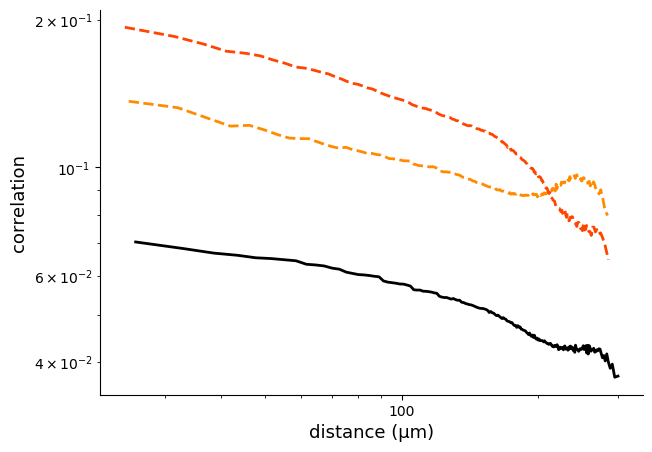

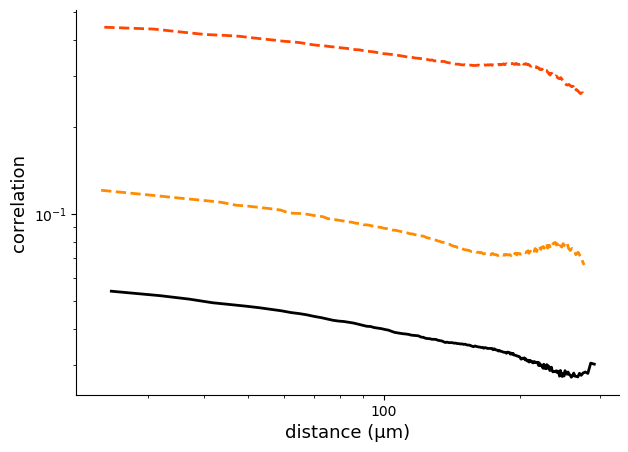

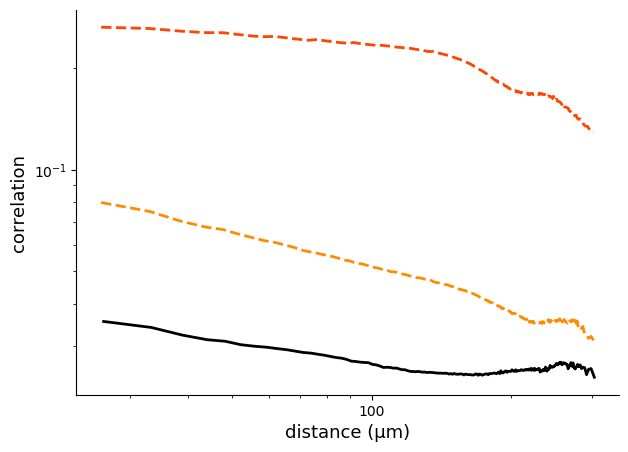

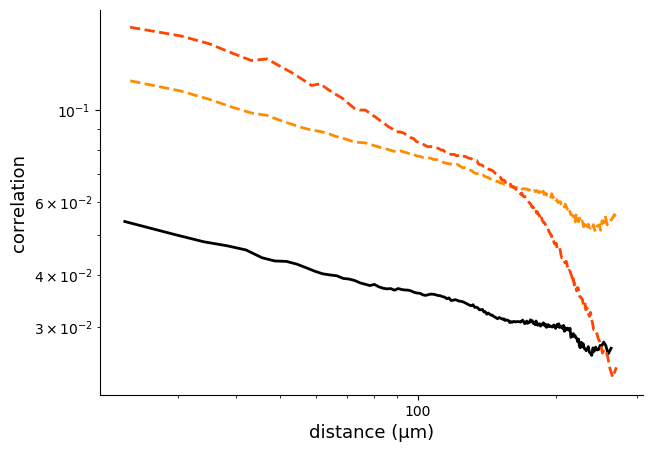

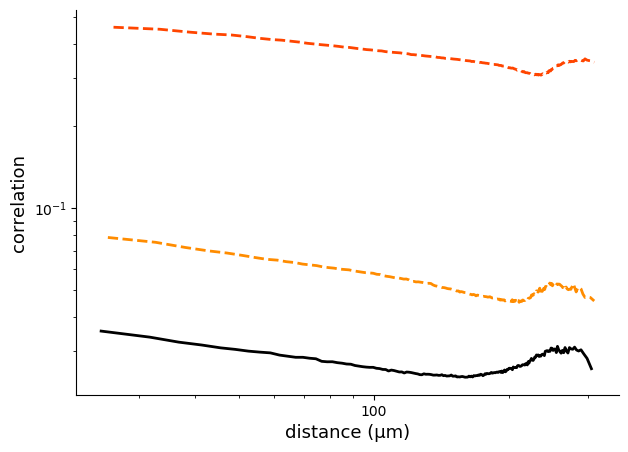

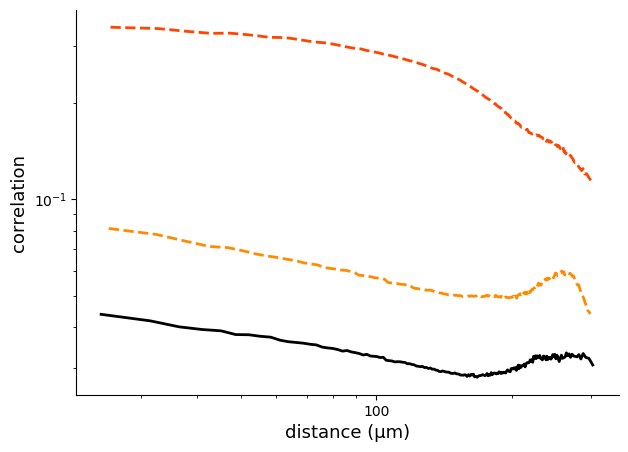

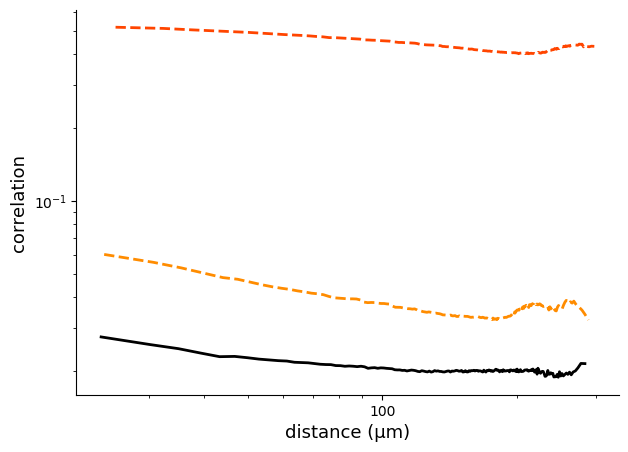

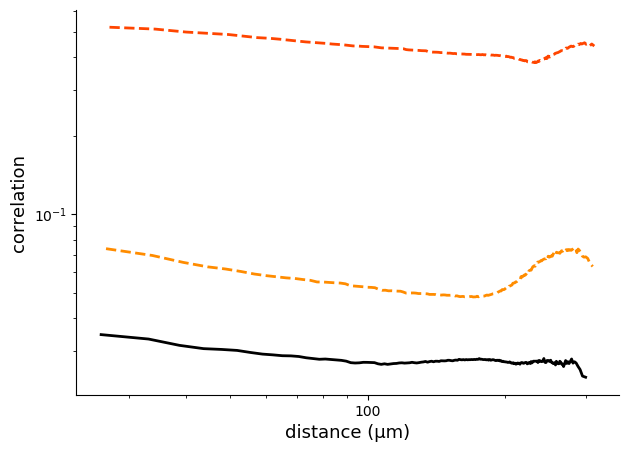

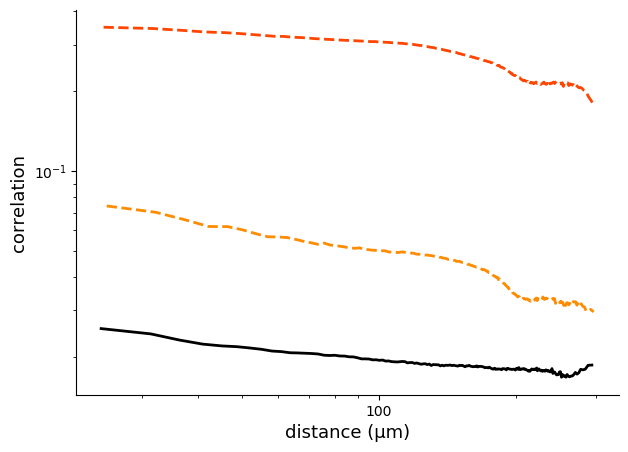

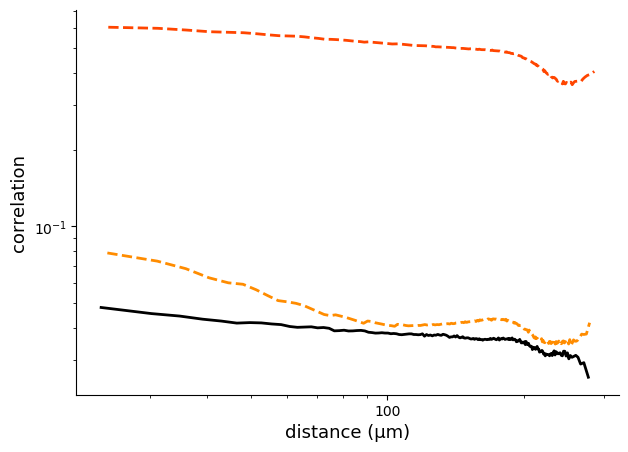

In [43]:
import matplotlib
import powerlaw
sns.reset_orig()
num1 = adfn.name_zero('front',2,12,1)

blnslope, p5slope, p20slope = list(range(11)), list(range(11)), list(range(11))
colors = ['black', 'darkorange','orangered']
lines = ['-', '--', '--']
count=0
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*corrdist_bins*'))
    p5list = sorted(glob.glob('*E-' + i + '*PTZ05*corrdist_bins*'))
    p20list = sorted(glob.glob('*E-' + i + '*PTZ20*corrdist_bins*'))
    plotlist = [blnlist,p5list,p20list]
    slopelist = [blnslope,p5slope,p20slope]
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(plotlist)):
        data = np.load(plotlist[e][0])
        xaxis = data[0]
        yaxis = data[1]
        axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
        slopelist[e][count] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:150]),np.log10(yaxis[:len(xaxis)-1][1:150]))[0]
    count+=1
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.set_xlabel('distance (μm)', size = '13')
    axarr.set_xticklabels(['100', '100', '100', '100'])
    axarr.set_ylabel('correlation', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

In [44]:
#EXPONENT
exp = np.zeros((33))
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

exdf = pd.DataFrame({"Exponent":np.append(slopelist[0],np.append(slopelist[1], slopelist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',11),np.append(adfn.repeat_list('PTZ 5mM',11),adfn.repeat_list('PTZ 20mM',11))), "Fish":flist})

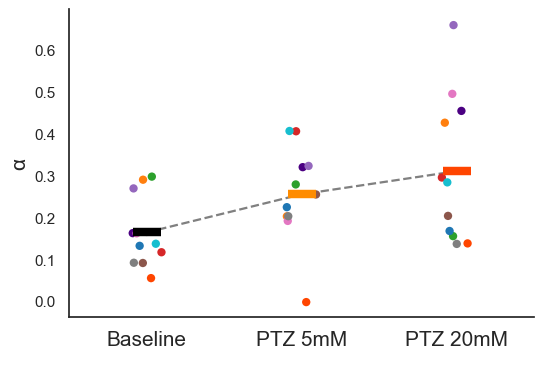

In [45]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Exponent", data = exdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Baseline', 'PTZ 5mM', 'PTZ 20mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [46]:
adfn.ttest(exdf, 'Labels', 'Exponent', ['Baseline', 'PTZ 5mM', 'PTZ 20mM'], mode='multiple')[0]

[[nan, nan, 0.016666666666666666, 'Not significant', 'Baseline - Baseline'],
 [-2.4516709784986195,
  0.03415996090541669,
  0.016666666666666666,
  'Not significant',
  'Baseline - PTZ 5mM'],
 [-3.2178666862720333,
  0.00920838890991934,
  0.016666666666666666,
  'Significant',
  'Baseline - PTZ 20mM']]

### Eigenspectrum
* change in slope in seizure vs baseline
* behaviour dimensionality collapse

In [47]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
blnpcv = sorted(glob.glob('*BLN*pcavar.npy'))
p5pcv = sorted(glob.glob('*PTZ05*pcavar.npy'))
p20pcv = sorted(glob.glob('*PTZ20*pcavar.npy'))

In [48]:
#Calculate entire trace PC-variance
""""from sklearn import decomposition
p5pcv = list(range(len(p5raw)))
for e in range(len(p5raw)):
    p_data = np.load(p5raw[e])
    n_components = p_data.shape[1]
    p_pca = decomposition.PCA(n_components) 
    p_fit = p_pca.fit(p_data) 
    p5pcv[e] = p_fit.explained_variance_ratio_
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, p5raw) + '_' + 'pcavar.npy', p5pcv[e])
    print('Saved fish #' + str(e))

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-48-e113d185390f>, line 11)

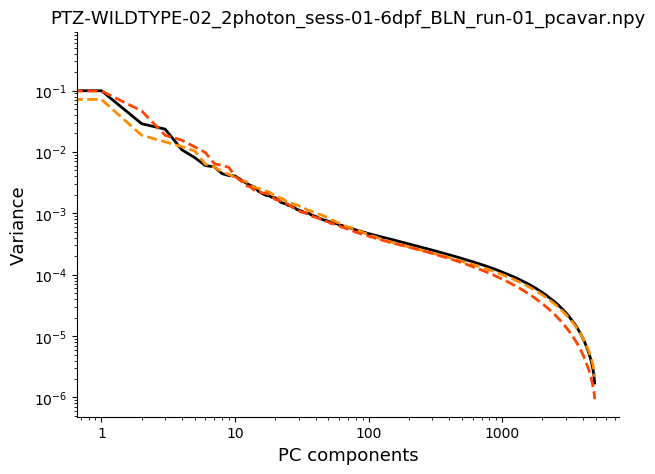

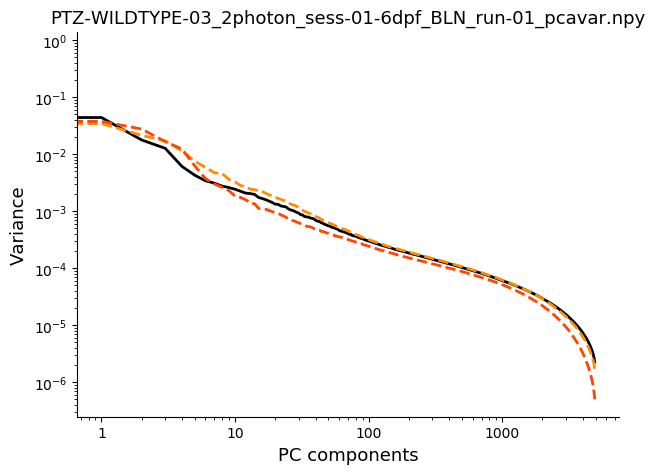

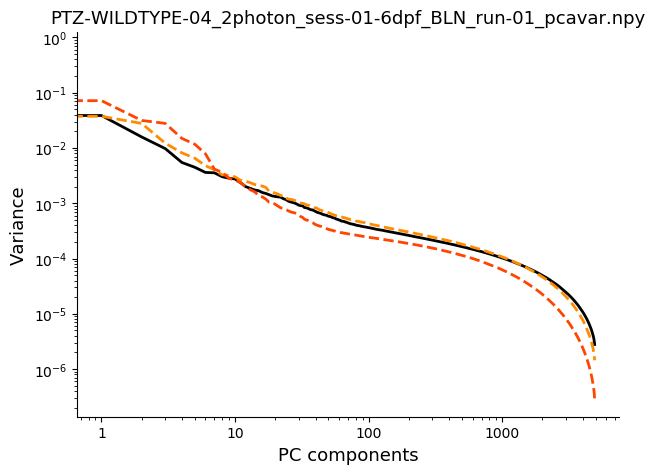

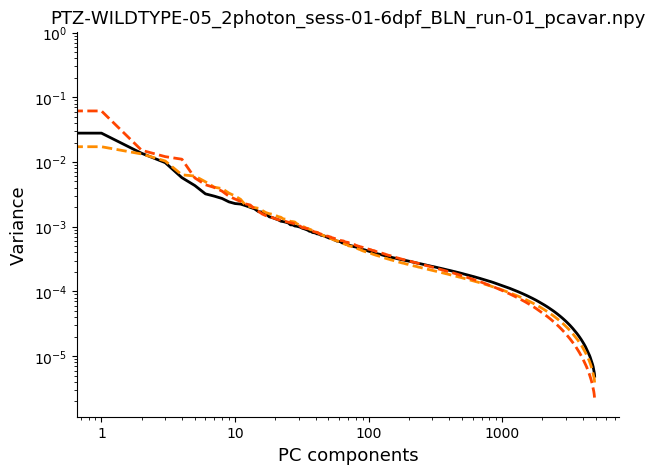

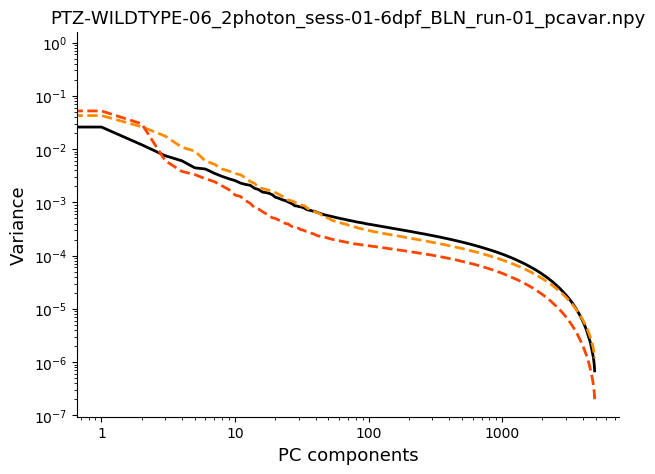

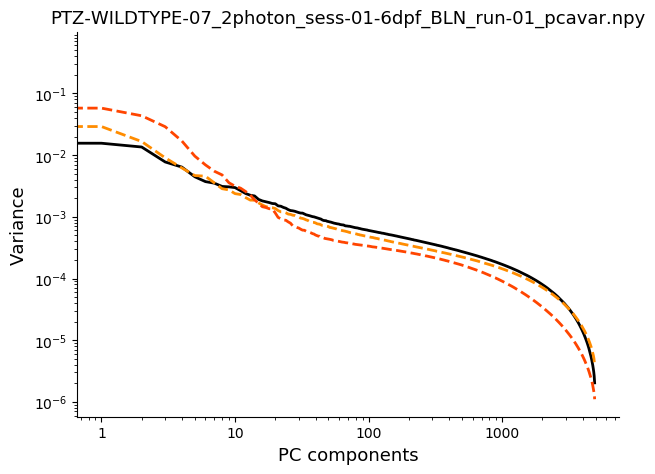

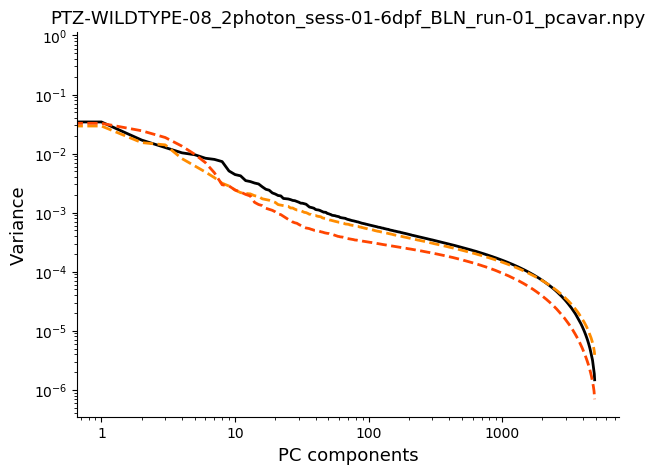

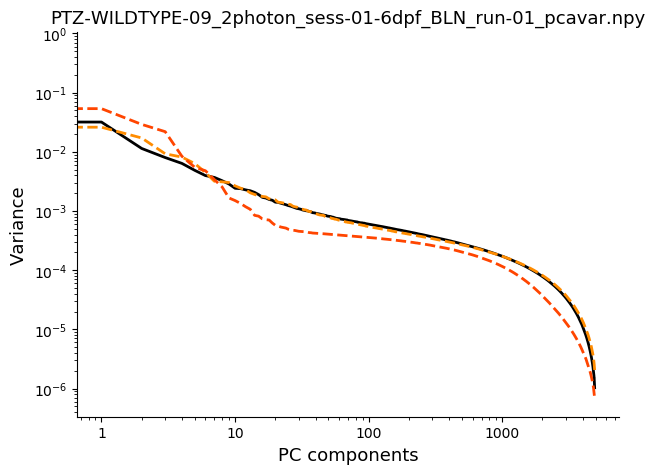

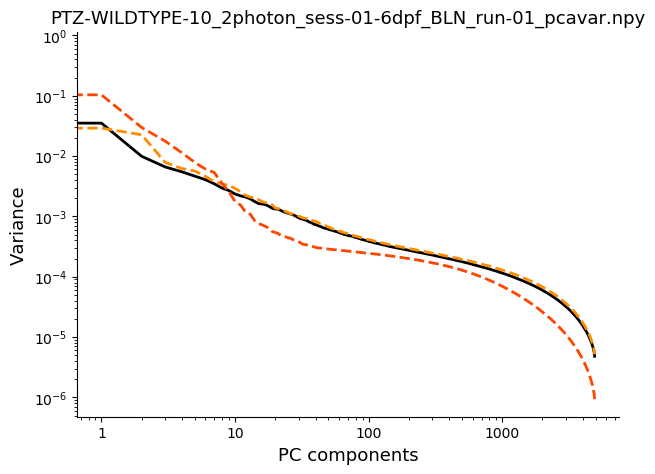

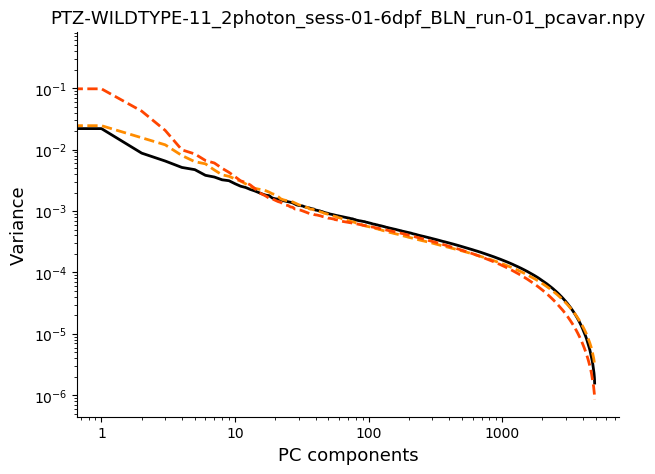

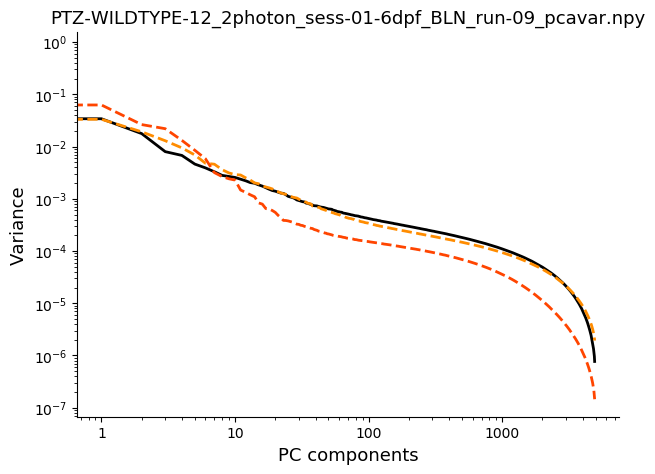

In [49]:
import matplotlib
import powerlaw
sns.reset_orig()
num1 = adfn.name_zero('front',2,12,1)

blnslope, p5slope, p20slope = list(range(11)), list(range(11)), list(range(11))
colors = ['black', 'darkorange','orangered']
lines = ['-', '--', '--']
count=0
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*_pcavar.npy*'))
    p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_pcavar.npy*'))
    p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_pcavar.npy*'))
    plotlist = [blnlist,p5list,p20list]
    slopelist = [blnslope,p5slope,p20slope]
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(plotlist)):
        data = np.load(plotlist[e][0])
        xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
        yaxis = data
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
        slopelist[e][count] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
    count+=1
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('Variance', size = '13')
    axarr.set_xlabel('PC components', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

In [50]:
#EXPONENT
exp = np.zeros((33))
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

exdf = pd.DataFrame({"Exponent":np.append(slopelist[0],np.append(slopelist[1], slopelist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',11),np.append(adfn.repeat_list('PTZ 5mM',11),adfn.repeat_list('PTZ 20mM',11))), "Fish":flist})

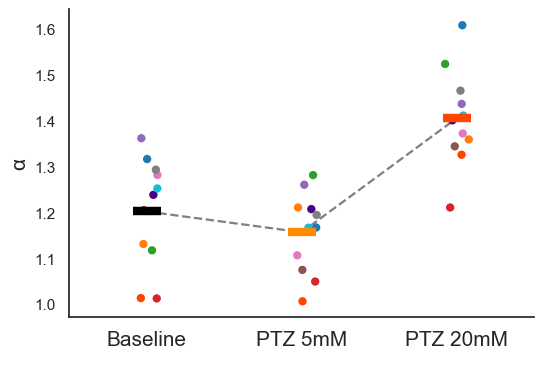

In [51]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="Exponent", data = exdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Exponent", data = exdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Baseline', 'PTZ 5mM', 'PTZ 20mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [52]:
adfn.ttest(exdf, 'Labels', 'Exponent', ['Baseline', 'PTZ 5mM', 'PTZ 20mM'], mode='single')

[[1.4295761508594784,
  0.18332736555444026,
  0.025,
  'Not significant',
  'Baseline - PTZ 5mM'],
 [-6.751579701032814,
  5.032342292450448e-05,
  0.025,
  'Significant',
  'Baseline - PTZ 20mM']]

# Null models